
Health and wellness
Technology and society
Education and learning
Environment and sustainability
Culture and traditions
Economy and finance
Politics and government
Science and discoveries
Art and creativity
Work and career
Leisure and entertainment
Travel and tourism
Food and nutrition
Sports and physical activity
Religion and spirituality
Fashion and style
History and heritage
Technology and gadgets
Transportation and mobility
Justice and human rights
Innovation and entrepreneurship
Communication and media
Community and society
Beauty and personal care
Home and domestic life
Money and personal finance
Security and protection
Creativity and artistic expression
Learning and personal development

In [1]:
from enum import Enum
from abc import ABC, abstractmethod

class Topics(Enum):
    """Enum representing different topics."""
    HEALTH_AND_WELLNESS = "Health and wellness"
    TECHNOLOGY_AND_SOCIETY = "Technology and society"
    EDUCATION_AND_LEARNING = "Education and learning"
    ENVIRONMENT_AND_SUSTAINABILITY = "Environment and sustainability"
    CULTURE_AND_TRADITIONS = "Culture and traditions"
    ECONOMY_AND_FINANCE = "Economy and finance"
    POLITICS_AND_GOVERNMENT = "Politics and government"
    SCIENCE_AND_DISCOVERIES = "Science and discoveries"
    ART_AND_CREATIVITY = "Art and creativity"
    WORK_AND_CAREER = "Work and career"
    LEISURE_AND_ENTERTAINMENT = "Leisure and entertainment"
    TRAVEL_AND_TOURISM = "Travel and tourism"
    FOOD_AND_NUTRITION = "Food and nutrition"
    SPORTS_AND_PHYSICAL_ACTIVITY = "Sports and physical activity"
    RELIGION_AND_SPIRITUALITY = "Religion and spirituality"
    FASHION_AND_STYLE = "Fashion and style"
    HISTORY_AND_HERITAGE = "History and heritage"
    TECHNOLOGY_AND_GADGETS = "Technology and gadgets"
    TRANSPORTATION_AND_MOBILITY = "Transportation and mobility"
    JUSTICE_AND_HUMAN_RIGHTS = "Justice and human rights"
    INNOVATION_AND_ENTREPRENEURSHIP = "Innovation and entrepreneurship"
    COMMUNICATION_AND_MEDIA = "Communication and media"
    COMMUNITY_AND_SOCIETY = "Community and society"
    BEAUTY_AND_PERSONAL_CARE = "Beauty and personal care"
    HOME_AND_DOMESTIC_LIFE = "Home and domestic life"
    MONEY_AND_PERSONAL_FINANCE = "Money and personal finance"
    SECURITY_AND_PROTECTION = "Security and protection"
    CREATIVITY_AND_ARTISTIC_EXPRESSION = "Creativity and artistic expression"
    LEARNING_AND_PERSONAL_DEVELOPMENT = "Learning and personal development"

class Belief:
    """Represents a belief with a topic and an opinion."""
    def __init__(self, topic, opinion):
        self.topic = topic
        self.opinion = opinion

    def __str__(self):
        return f"{self.topic}: {self.opinion}"
    
    def get_belief(self):
        """Returns the belief as a tuple (topic, opinion)."""
        return (self.topic, self.opinion)

class Message:
    """Represents a message with strength and beliefs."""
    def __init__(self, strength, beliefs):
        self.beliefs = beliefs
        self.strength = strength
    
    def _update_strength(self, delta):
        """Updates the strength of the message by adding delta."""
        self.strength += delta
    
    def increase_strength(self):
        """Increases the strength of the message by 1."""
        return self._update_strength(1)

    def decrease_strength(self):
        """Decreases the strength of the message by 1."""
        return self._update_strength(-1)
    
    def get_topics(self):
        """Returns a list of topics covered in the message."""
        return [belief.topic for belief in self.beliefs]

    def get_beliefs(self):
        """Returns a dictionary of beliefs and their opinions."""
        return {belief.topic: belief.opinion for belief in self.beliefs}

    def change_belief(self, topic, new_opinion):
        """
        Changes the opinion of the belief with the specified topic.
        
        If the topic does not exist in beliefs, creates a new belief.
        """
        for belief in self.beliefs:
            if belief.topic == topic:
                belief.opinion = new_opinion
                return
        self.beliefs.append(Belief(topic, new_opinion))
    
    def increase_belief(self, topic):
        """Increases the opinion of the belief with the specified topic by 1."""
        for belief in self.beliefs:
            if belief.topic == topic:
                belief.opinion = min(belief.opinion + 1, 2)
                return

    def decrease_belief(self, topic):
        """Decreases the opinion of the belief with the specified topic by 1."""
        for belief in self.beliefs:
            if belief.topic == topic:
                belief.opinion = max(belief.opinion - 1, -2)
                return

    def clone(self):
        """Returns a copy of the message."""
        return Message(self.strength, self.beliefs.copy())

    def __str__(self):
        """Returns a string representation of the message."""
        message_str = f"Message Strength: {self.strength}\nBeliefs:\n"
        for belief in self.beliefs:
            message_str += str(belief) + "\n"
        return message_str


# Ejemplo de uso
belief1 = Belief(Topics.BEAUTY_AND_PERSONAL_CARE.value, 1)
# belief2 = Belief(Topics.HEALTH_AND_WELLNESS.value, -1)
# belief3 = Belief(Topics.TECHNOLOGY_AND_SOCIETY.value, 0)
# belief4 = Belief(Topics.FOOD_AND_NUTRITION.value, -2)

message = Message(3, [belief1])#, belief2, belief3, belief4])

# Imprimir el mensaje
print(message)

# Obtener los temas que trata
print("Topics:", message.get_topics())

# Obtener un diccionario de creencias y opiniones
print("Beliefs:", message.get_beliefs())


# Imprimir el mensaje actualizado
print("\nMessage after changing opinion:")
print(message)





Message Strength: 3
Beliefs:
Beauty and personal care: 1

Topics: ['Beauty and personal care']
Beliefs: {'Beauty and personal care': 1}

Message after changing opinion:
Message Strength: 3
Beliefs:
Beauty and personal care: 1



In [2]:
class DecisionRule(ABC):
    """Abstract base class for decision rules."""
    @abstractmethod
    def decide(self, agent_beliefs, message_interest, message_agreement):
        """Decides whether to transmit the message."""
        pass

    @abstractmethod
    def alter(self, agent_beliefs, common_topics, message_interest, message_agreement):
        """Alters the message based on agent beliefs and message agreement."""
        pass
    
class AgreementWithMessageRule(DecisionRule):
    """Decision rule to transmit the message without alterations if agreement and interest are high."""
    def decide(self, agent_beliefs, message_interest, message_agreement):
        """Decides whether to transmit the message without alterations."""
        agreement_threshold = 0.5
        interest_threshold = 0.5
        
        average_agreement = sum(message_agreement.values()) / len(message_agreement)

        if average_agreement > agreement_threshold and message_interest > interest_threshold:
            return True  # Transmit the message without alterations
        else:
            return False  # Do not transmit the message

    def alter(self, agent_beliefs, common_topics, message_interest, message_agreement):
        """Does not alter the message as it is transmitted without changes."""
        return message

class DisagreementWithMessageRule(DecisionRule):
    """Decision rule to not transmit the message if disagreement and interest are high."""
    def decide(self, agent_beliefs, message_interest, message_agreement):
        """Decides whether to not transmit the message."""
        disagreement_threshold = -0.5
        interest_threshold = 0.5

        average_agreement = sum(message_agreement.values()) / len(message_agreement)

        if average_agreement < disagreement_threshold and message_interest > interest_threshold:
            return True  # Do not transmit the message
        else:
            return False  # Transmit the message

    def alter(self, agent_beliefs, common_topics, message_interest, message_agreement):
        """Does not alter the message as it is not transmitted."""
        return None

class AdjustMessageRule(DecisionRule):
    """Decision rule to adjust the message based on agreement and interest."""
    def decide(self, agent_beliefs, message_interest, message_agreement):
        """Decides whether to adjust the message."""
        agreement_moderation_range = (-0.5, 0.5)
        interest_threshold = 0.5
        
        if len(message_agreement) == 0:
            return False  # No agreement in the message
        average_agreement = sum(message_agreement.values()) / len(message_agreement)

        if agreement_moderation_range[0] <= average_agreement <= agreement_moderation_range[1] and message_interest > interest_threshold:
            return True  # Adjust the message
        else:
            return False  # Do not adjust the message

    def alter(self, agent_beliefs, common_topics, message_interest, message_agreement):
        """Alters the message based on agent beliefs and message agreement."""
        new_message = message.clone()
        for topic in common_topics:  
            if message_agreement[topic] > 0:
                new_message.increase_belief(topic)
            elif message_agreement[topic] <= 0:
                new_message.decrease_belief(topic)

        return new_message


In [3]:
from abc import ABC, abstractmethod

class AgentInterface(ABC):
    """Abstract base class for agent interfaces."""
    @abstractmethod
    def receive_message(self, message):
        """Receives a message and triggers the agent's deliberation."""
        pass

    @abstractmethod
    def deliberate(self, message, agreement, interest, common_topics):
        """Deliberates on whether to transmit, alter, or not transmit the message."""
        pass

    @abstractmethod
    def execute_action(self, message):
        """Executes the action determined by the deliberation."""
        pass


class Agent(AgentInterface):
    """Agent class implementing the AgentInterface."""
    def __init__(self, beliefs, decision_rules, name=''):
        """Initializes the agent with beliefs and decision rules."""
        self.name = name
        self.beliefs = beliefs  # Agent's beliefs
        self.decision_rules = decision_rules  # Decision rules for deliberation

    def receive_message(self, message: Message):
        """Receives a message and initiates the deliberation process."""
        message_beliefs = message.get_beliefs()
        agent_beliefs = {belief.topic: belief.opinion for belief in self.beliefs}

        agreement_with_message, interest_on_message, common_topics = self.calculate_agreement_and_interest(agent_beliefs, message_beliefs)
        self.deliberate(message, agreement_with_message, interest_on_message, common_topics)

    def deliberate(self, message, agreement, interest, common_topics):
        """Deliberates on whether to transmit, alter, or not transmit the message."""
        new_message = message.clone()

        for rule in self.decision_rules:
            decision = rule.decide(self.beliefs, interest, agreement)
            if decision:
                new_message = rule.alter(self.beliefs, common_topics, interest, agreement)
                break
        
        self.execute_action(new_message)
        
    def execute_action(self, message):
        """Executes the action determined by the deliberation."""
        print(message)

    def calculate_agreement_and_interest(self, agent_beliefs, message_beliefs):
        """Calculates agreement and interest between agent beliefs and message beliefs."""
        common_topics = set(agent_beliefs.keys()) & set(message_beliefs.keys())

        agreement_scores = {}

        for topic in common_topics:
            total_agreement = abs(agent_beliefs[topic] - message_beliefs[topic])
            max_possible_agreement = 2  # Maximum agreement possible on a single topic (both opinions are +2 or -2)

            agreement_score = 1 - (total_agreement / max_possible_agreement)  # Convert difference to agreement score
            agreement_scores[topic] = agreement_score

        return agreement_scores, len(common_topics), common_topics



In [4]:
# Ejemplo de uso
belief1 = Belief(Topics.BEAUTY_AND_PERSONAL_CARE.value, 1)
# belief2 = Belief(Topics.HEALTH_AND_WELLNESS.value, -1)
# belief3 = Belief(Topics.TECHNOLOGY_AND_SOCIETY.value, 0)
# belief4 = Belief(Topics.FOOD_AND_NUTRITION.value, -2)

message = Message(3, [belief1])#, belief2, belief3, belief4])

belief1 = Belief(Topics.BEAUTY_AND_PERSONAL_CARE.value, -1)
# belief2 = Belief(Topics.HEALTH_AND_WELLNESS.value, 1)
# belief3 = Belief(Topics.TECHNOLOGY_AND_SOCIETY.value, -1)
# belief4 = Belief(Topics.FOOD_AND_NUTRITION.value, -2)

agreeRule = AgreementWithMessageRule()
disagreeRule = DisagreementWithMessageRule()
adjustRule = AdjustMessageRule()

print(message)
agent = Agent([belief1], [agreeRule, disagreeRule, adjustRule], '')
agent.receive_message(message)

Message Strength: 3
Beliefs:
Beauty and personal care: 1

Message Strength: 3
Beliefs:
Beauty and personal care: 0



In [5]:
# Función para simular la transmisión de un mensaje
def simulate_message_transmission(G, agents : Agent, initial_agent_index):
    # Crear un mensaje inicial
    initial_message = Message(3, [Belief(Topics.BEAUTY_AND_PERSONAL_CARE.value, 1)])
    
    # Lista para rastrear si cada agente ha recibido el mensaje
    received_message = [False] * len(agents)
    
    # Cola para la transmisión del mensaje
    message_queue = [(initial_agent_index, initial_message)]
    
    while message_queue:
        sender, message = message_queue.pop(0)
        received_message[sender] = True
        
        # Enviar el mensaje a los vecinos del remitente
        for neighbor in G.neighbors(sender):
            if not received_message[neighbor]:
                # Decidir si el agente transmite el mensaje y si lo modifica
                decision_rule = agents[neighbor].decision_rules[0] # Suponiendo que cada agente tiene una regla de decisión
                if decision_rule.decide(agents[neighbor].beliefs, message.strength, message.get_beliefs()):
                    new_message = decision_rule.alter(agents[neighbor].beliefs, message.get_topics(), message.strength, message.get_beliefs())
                    message_queue.append((neighbor, new_message))
    
    return received_message


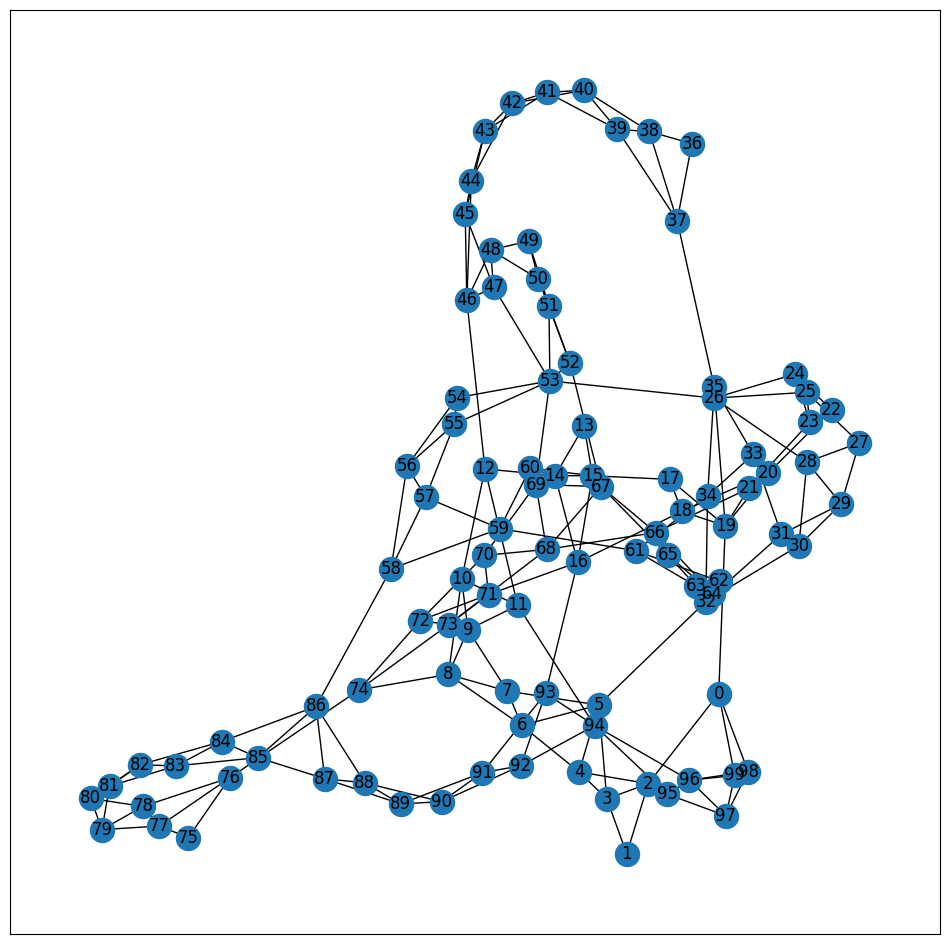

[True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]


In [8]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Número de agentes
N = 100

# Crear un grafo de mundo pequeño con NetworkX
G = nx.watts_strogatz_graph(n=N, k=4, p=0.1)

# Definir N agentes con creencias y reglas de decisión
agents = []
for i in range(N):
    # Crear creencias y reglas de decisión para cada agente
    belief1 = Belief(Topics.HEALTH_AND_WELLNESS.value, random.randint(-2, 2))  # Creencia positiva sobre salud
    belief2 = Belief(Topics.TECHNOLOGY_AND_SOCIETY.value, random.randint(-2, 2))  # Creencia negativa sobre tecnología
    belief3 = Belief(Topics.ENVIRONMENT_AND_SUSTAINABILITY.value, random.randint(-2, 2))  # Creencia neutral sobre medio ambiente
    beliefs = [belief1, belief2, belief3]

    # Crear reglas de decisión para cada agente
    agree_rule = AgreementWithMessageRule()
    disagree_rule = DisagreementWithMessageRule()
    adjust_rule = AdjustMessageRule()
    decision_rules = [agree_rule, disagree_rule, adjust_rule]
    agent = Agent(beliefs, decision_rules, name=f"Agent_{i}")
    agents.append(agent)
    
    # Agregar el agente como un nodo en el grafo
    G.nodes[i]['beliefs'] = beliefs
    G.nodes[i]['decision_rules'] = decision_rules

# Simular la transmisión del mensaje desde el agente 0
received_message = simulate_message_transmission(G, agents, 0)

# Visualizar el grafo
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, pos, with_labels=True)
plt.show()
print(received_message)
